This notebook was made to redo the k means clustering as well as create a polished revision of the original [initial_exploration](https://github.com/44-566-Machine-Learning-S24/ml-s24-project-CarterPlenge/blob/master/initial_exploration.ipynb) notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

ds_1 = pd.read_csv("../seattle-weather.csv")
ds_1["date"] = pd.to_datetime(ds_1["date"])

#convert weather field into numerical values
weather_mapping = {'drizzle': 0, 'rain': 1, 'sun': 2, 'snow': 3, 'fog': 4}
ds_1["weather"] = ds_1["weather"].map(weather_mapping)
#adding previous days temp
ds_1['prev_temp_min'] = ds_1['temp_min'].shift(1)
ds_1['prev_temp_max'] = ds_1['temp_max'].shift(1)

ds_1 = ds_1.dropna()
ds_1.drop(columns=["date"], inplace=True)

X = ds_1[["temp_max","precipitation","wind"]]
Y = ds_1["weather"]
ds_1.describe()

,precipitation,temp_max,temp_min,wind,weather,prev_temp_min,prev_temp_max
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.031507,16.441575,8.236986,3.240137,1.645890,8.241849,16.446507
std,6.682012,7.351659,5.024011,1.437810,0.866688,5.017430,7.346794
min,0.000000,-1.600000,-7.100000,0.400000,0.000000,-7.100000,-1.600000
25%,0.000000,10.600000,4.400000,2.200000,1.000000,4.400000,10.600000
50%,0.000000,15.600000,8.300000,3.000000,2.000000,8.300000,15.600000
75%,2.850000,22.200000,12.200000,4.000000,2.000000,12.200000,22.200000
max,55.900000,35.600000,18.300000,9.500000,4.000000,18.300000,35.600000


I added the previous day's min and max temp as I thought it would be useful when predicting foggy days. 

### Data Distribution

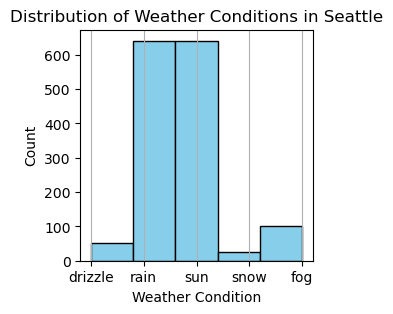

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
ds_1['weather'].hist(bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Weather Conditions in Seattle')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(range(5), weather_mapping.keys())
plt.grid(axis='y')
plt.show()

### Clustering

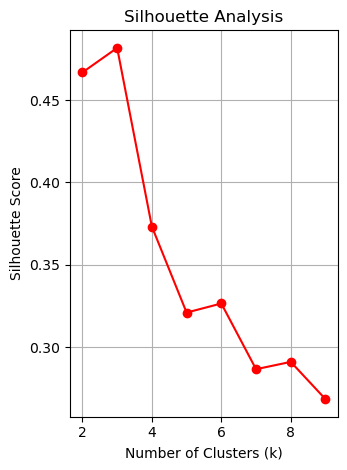

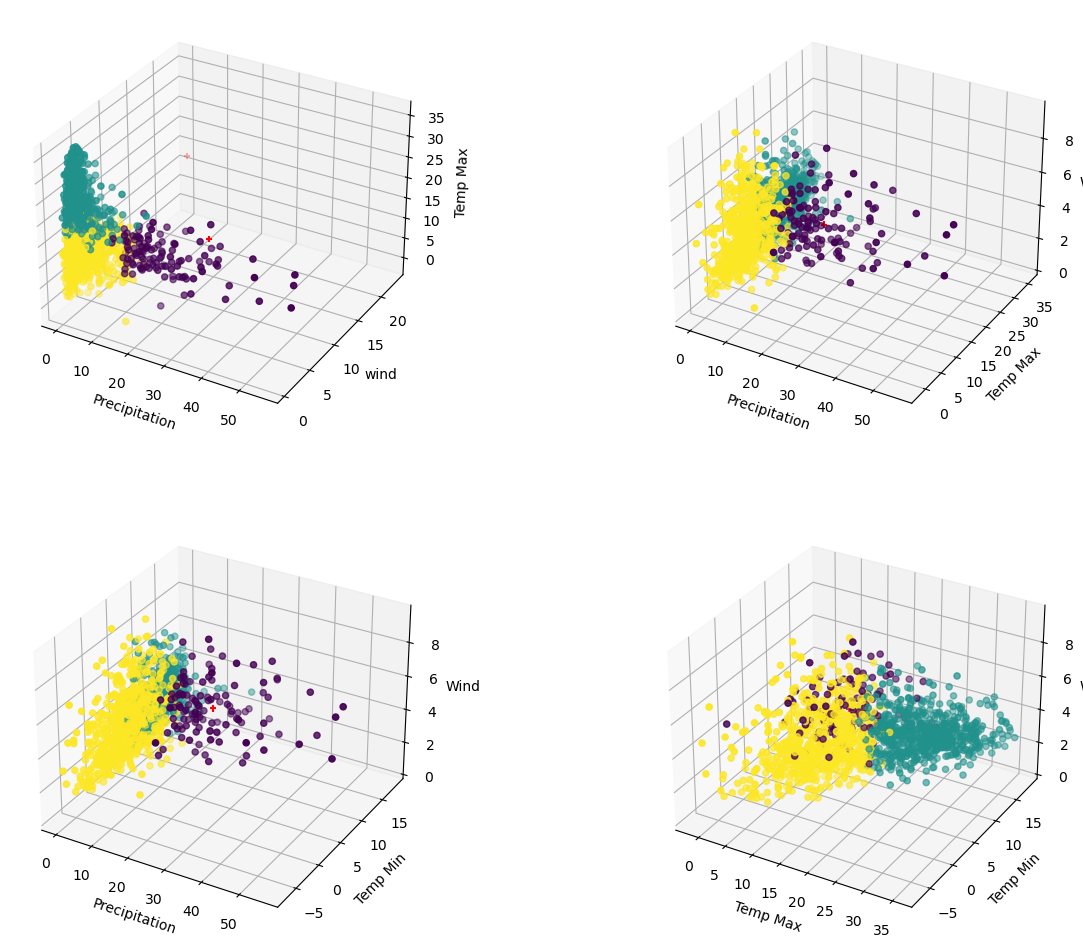

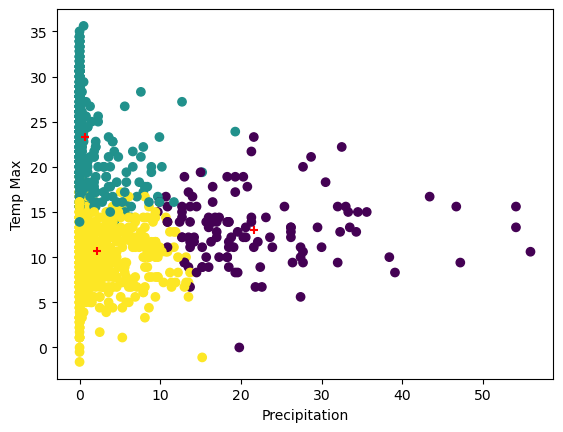

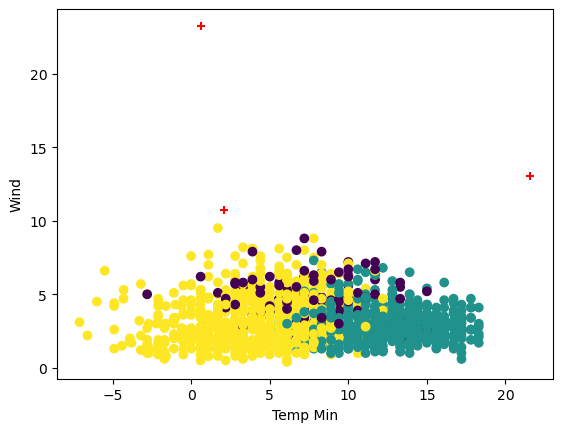

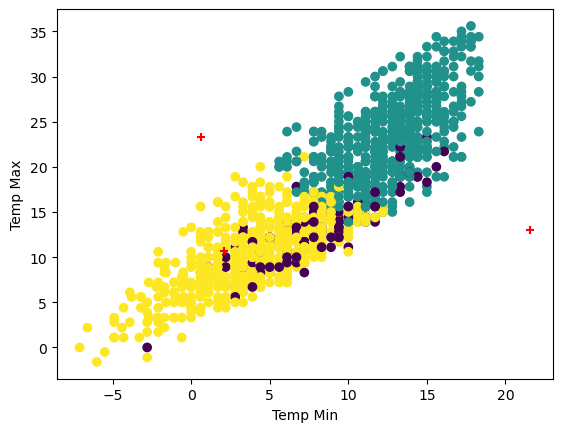

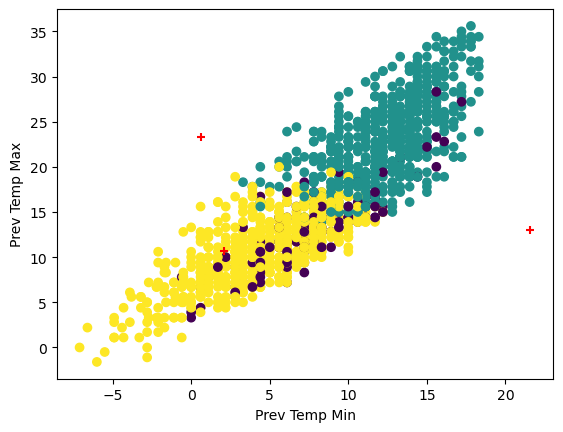

In [3]:
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

X = ds_1[["precipitation", 'temp_max', 'temp_min', 'wind', 'prev_temp_min', 'prev_temp_max']]

k_values = range(2, 10)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, 'ro-')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

kmeans_classifier = KMeans(n_clusters=3)
kmeans_classifier.fit(X)


cluster_x = [x for [x, y, z, w, u, v] in kmeans_classifier.cluster_centers_]
cluster_y = [y for [x, y, z, w, u, v] in kmeans_classifier.cluster_centers_]
cluster_z = [z for [x, y, z, w, u, v] in kmeans_classifier.cluster_centers_]
cluster_w = [w for [x, y, z, w, u, v] in kmeans_classifier.cluster_centers_]


# plot data and look for clusters
fig = plt.figure(figsize=(15, 12))


ax = fig.add_subplot(221, projection='3d')
ax.scatter(ds_1['precipitation'], ds_1['wind'], ds_1['temp_max'], c=kmeans_classifier.labels_)
ax.scatter(cluster_x, cluster_y, cluster_z, marker="+", color="red")
ax.set_xlabel('Precipitation')
ax.set_ylabel('wind')
ax.set_zlabel('Temp Max')

ax = fig.add_subplot(222, projection='3d')
ax.scatter(ds_1['precipitation'], ds_1['temp_max'], ds_1['wind'], c=kmeans_classifier.labels_)
ax.scatter(cluster_x, cluster_y, cluster_w, marker="+", color="red")
ax.set_xlabel('Precipitation')
ax.set_ylabel('Temp Max')
ax.set_zlabel('Wind')

ax = fig.add_subplot(223, projection='3d')
ax.scatter(ds_1['precipitation'], ds_1['temp_min'], ds_1['wind'], c=kmeans_classifier.labels_)
ax.scatter(cluster_x, cluster_z, cluster_w, marker="+", color="red")
ax.set_xlabel('Precipitation')
ax.set_ylabel('Temp Min')
ax.set_zlabel('Wind')

ax = fig.add_subplot(224, projection='3d')
ax.scatter(ds_1['temp_max'], ds_1['temp_min'], ds_1['wind'], c=kmeans_classifier.labels_)
ax.scatter(cluster_y, cluster_z, cluster_w, marker="+", color="red")
ax.set_xlabel('Temp Max')
ax.set_ylabel('Temp Min')
ax.set_zlabel('Wind')

plt.show()

# 2D Scatter plots
plt.scatter(ds_1['precipitation'], ds_1['temp_max'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("Precipitation")
plt.ylabel("Temp Max")
plt.show()

plt.scatter(ds_1['temp_min'], ds_1['wind'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("Temp Min")
plt.ylabel("Wind")
plt.show()

plt.scatter(ds_1['temp_min'], ds_1['temp_max'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("Temp Min")
plt.ylabel("Temp Max")
plt.show()

plt.scatter(ds_1['prev_temp_min'], ds_1['prev_temp_max'], c=kmeans_classifier.labels_)
plt.scatter(cluster_x, cluster_y, marker="+", color="red")
plt.xlabel("Prev Temp Min")
plt.ylabel("Prev Temp Max")
plt.show()


The silhouette score suggests that there are 3 clusters. These clusters divide the data set in half based on temp Max, then include all of the data points with high precipitation in a different cluster. Upon checking out 5 clusters it does the same but divides temp max into 4 categories. 